# IA Paper 3 - Linear circuits - Examples paper 2

Question 2 shows a graph of the $I−V$ characteristic of a diode. This curve is described by the Shockley diode equation:

$$
I = I_S \left[ \exp \left( \frac{V}{nV_T} \right) - 1 \right]
$$

where $I_S$ is the small reverse saturation saturation current, $V_T$ is the thermal voltage and $n$ is the ideality factor which typically ranges from 1 to 2. 

The thermal voltage is:

$$
V_T = \frac{kT}{q}, 
$$

with Boltzmann’s constant $k = 1.38 \times 10^{−23}$ J/K and the electron charge $q = 1.6 \times 10^{−19} $ C. At room temperature ($T = 300$ K) $V_T \approx 26$ mV. For $V \gg V_T$ the $−1$ in the equation can be neglected. For more information look up the Shockley diode equation. 

The reverse saturation saturation current can be approximated by:

$$
I_S = \exp \left( \frac{-E_g}{nkT} \right)
$$

where $E_g$ is the energy gap between the valence and conduction bands of the semi-conductor. 

1. Use Python to find values of the parameters $I_S$ and $n$ by fitting the above equations to the data of 
   the $I - V$ characteristic of the diode shown on the Examples paper. 
1. After having found $n$ ad $E_g$ one can also calculate the $I - V$ curve of the diode at other temperatures. 
   Write a Python program to do that. Note that $E_g$ is assumed to be temperature independent - which is valid 
   as long as $T$ does not vary too much. How does the temperature dependence of the $I − V$ curves change 
   if $I_S$ is assumed to temperature independent, e.g. fixed to the value at $T = 300$ K?

## Solution

We import the modules `matplotlib` and `numpy`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

First, we read the diode current off the graph for, e.g., $V = 0.5, 0.55, 0.575, 0.60, 0.625$ V, etc. Using a text editor we can save the diode voltage and diode current as two columns and save the data in a separate values file.  These values are consequently read into Python `numpy` array as followed:

In [2]:
# Read in data from file from the Internet
import urllib.request
url = "https://raw.githubusercontent.com/CambridgeEngineering/Part-IA-ExamplesPapers-Python/master/paper3/linear-circuits-and-devices/diode_data.dat"
response = urllib.request.urlopen(url)
data = np.loadtxt(response)

# Store input data into 
V_data = data[:, 0]       # Voltage in V
I_data = data[:, 1]*1e-3  # Current in A

We can proceed to plot the data.

As given in the question, for $V \gg V_T$ the diode current is approximated by:

$$
I \approx I_S \exp \left( \frac{V}{nV_T} \right)
$$

Taking natural log of both sides, and using $V_T = kT/q$ give us:

$$
\ln I \approx \ln I_S + \frac{q}{n kT}V
$$

Hence, we can fit a 1D line to our input data - of `v_data` and natural log of `i_data`. This gives us the intersection, which is $\ln I_S$, and the slope, which is $V/(nV_T)$. Obtaining these coefficient will help us calculating the value of $I_S$ and $n$.

Let's first define some constant for the problem. 

In [3]:
# Constant definition
k = 1.38e-23     # Boltzmann constant in J/K
q = 1.602e-19    # electron charge in C
T = 300          # Temperature in Kelvin

To fit a 1D line to data points, `numpy` provides the function `polyfit`. More references on how the function is used can be found [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). A function of the form $y = ax + b$ is fitted to the data by the following: 

In [4]:
# Fit a straight line to v_data and ln(i_data (using http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)
fp = np.polyfit(V_data, np.log(I_data), 1)
print(fp)

[ 35.83075096 -27.25425996]


To visualise this straight line, we need to convert the coefficient in `fp` into a function that calculate the $y$-value of the fitted line given its $x$-value using the `numpy` function `poly1d`. We call these fitted values for voltage and current `V_Fit` and `I_Fit` respectively.

In [5]:
# Get the function from the polynomial
p = np.poly1d(fp)

# Create a fitted value for voltage and current of diode
V_fit = np.linspace(0.4, 0.7, 200)
I_fit = np.exp(p(V_fit))

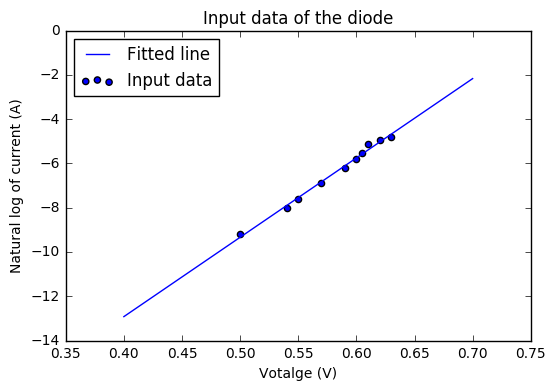

In [6]:
# Plot the input data
plt.scatter(V_data, np.log(I_data), label='Input data')

# Plot the fitted value
plt.plot(V_fit, np.log(I_fit), label='Fitted line')

# Add axis label and title
plt.ylabel('Natural log of current (A)')
plt.xlabel('Votalge (V)')
plt.title('Input data of the diode')
plt.legend(loc=2);

The fit parameters $a$ - the slope - and $b$ - the intersection - are stored in the first and second element of `fp`. We can use these values to calculate our $I_S$, $n$ and eventually $E_g$.

In [7]:
# Calculate value of I_S and n
n = q/(k*T*fp[0])    # The ideality factor
I_S = np.exp(fp[1])  # The reverse saturation current, in A

# Then the band gap energy, in eV
E_g = -np.log(I_S)*n*k*T/q

# View these values
print('The ideality factor: n = {}'.format(n))
print('The reverse saturation current: I_S = {} A'.format(I_S))
print('The band gap energy: E_g = {} eV'.format(E_g))

The ideality factor: n = 1.0799564936036952
The reverse saturation current: I_S = 1.4575561462448346e-12 A
The band gap energy: E_g = 0.7606388150437192 eV


We can compare our fitted values with the Shockley diiode equation. Let's calculate our value of the diode's current using this equation first.

In [8]:
# calvualte thermal voltage
V_T = k*T/q    # in V

# Calcualte the current using the Shockley diode equation
I_300 = I_S*(np.exp(V_fit/(n*V_T)) - 1)

Now we can plot these values on the same figure for comparison.

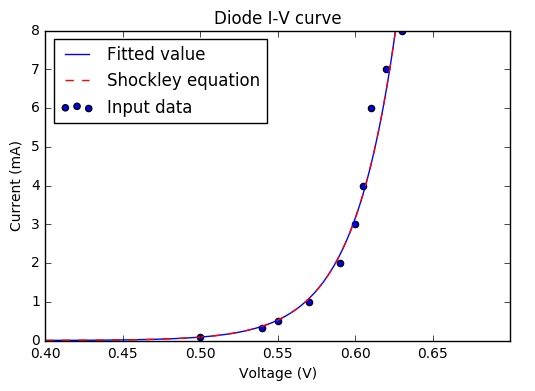

In [9]:
# Plot the input data on a linear scale
plt.scatter(V_data, I_data*1e3, label='Input data')
# Now plot our fitted value
plt.plot(V_fit, I_fit*1e3, label='Fitted value')
# And using Shockley diode equation
plt.plot(V_fit, I_300*1e3, '--r', label='Shockley equation')

# Set axis limit to match the graph on the example paper
plt.axis([0.4, 0.7, 0, 8])

# Label axis and graph title
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('Diode I-V curve')
plt.legend(loc=2);

The graph proves that our assumption provides a good approximation for the voltage-current curve of the Shockley diode. 

Having found $I_S$, $n$ and $E_g$, we can also calculate the $I - V$ curve of the diode at other temperatures. Note that here $E_g$ is assumed to be temperature independent, which is valid *as long as* $T$ does not vary too much. Additionally, $I_S$ is also assumed to be temperature independent. 

For convenient, we define a function to calculate the diode's saturation current $I_S$ using our approximation:

In [10]:
def diode_saturation_current(T):
    "Calculate Shockley diode saturation current"
    return np.exp(-E_g*q/(n*k*T))

And another function to compute the $I-V$ curve using the Shockley diode equation:

In [11]:
def shockley_diode(v, T):
    "Calculate diode's current using Shockley equation"
    v_T = k*T/q
    return I_S*(np.exp(v/(n*v_T)) - 1)

We may need to check if our approximated curve is still good at different temperature:

In [12]:
def shockley_diode_approximate(v, T):
    "Approximate diode's current using Shockley equation"
    v_T = k*T/q
    return I_S*np.exp(v/(n*v_T))

Now we can compute the $I-V$ curve at different temperature with ease:

In [13]:
# Compute the I-V curve for T = 330K
T = 330
I_S_330 = diode_saturation_current(330)
I_330 = shockley_diode(V_fit, 330)
I_330_approx = shockley_diode_approximate(V_fit, 330)

# Compute the I-V curve for T = 270K
T = 270
I_S_270 = diode_saturation_current(270)
I_270 = shockley_diode(V_fit, 270)
I_270_approx = shockley_diode_approximate(V_fit, 270)

We can now plot these curves on the same graph for comparison. 

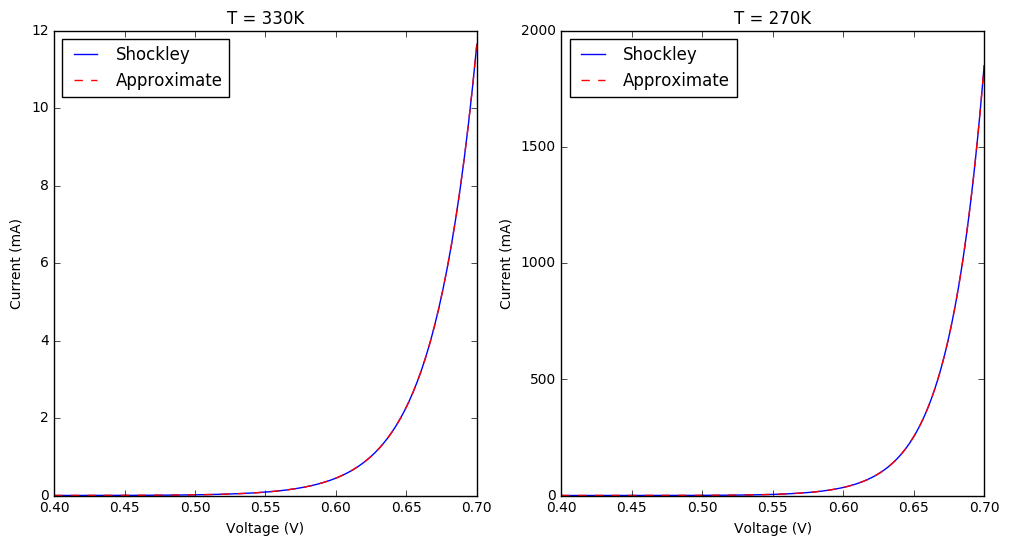

In [14]:
# Initilise figure
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# Plot the I-V curve for T = 330K
ax1.plot(V_fit, I_330*1e3, label='Shockley')
ax1.plot(V_fit, I_330_approx*1e3, '--r', label='Approximate')
ax1.set_xlabel('Voltage (V)')
ax1.set_ylabel('Current (mA)')
ax1.set_title('T = 330K')
ax1.legend(loc=2);

# Plot the I-V curve for T = 270K
ax2.plot(V_fit, I_270*1e3, label='Shockley')
ax2.plot(V_fit, I_270_approx*1e3, '--r', label='Approximate')
ax2.set_xlabel('Voltage (V)')
ax2.set_ylabel('Current (mA)')
ax2.set_title('T = 270K')
ax2.legend(loc=2);

To fully learn the effect of changing the temperature, we can create a simple interactive widget below. First we need to import the `ipywidgets` module.

In [15]:
from ipywidgets import interact, IntSlider

We now create a function to plot the $I-V$ at a given temperature:

In [16]:
def plot_curve(T):
    "Function to plot the I-V curve"
    # Compute the I-V curve
    I_S = diode_saturation_current(T)
    I = shockley_diode(V_fit, T)
    
    # Plot the curve
    plt.plot(V_fit, I*1e3, label='T={}K'.format(T))
    
    # Plot the reference curve for T=300
    plt.plot(V_fit, I_300*1e3, label='T=300K')
    
    # Set axis limit to match the graph on the example paper
    plt.axis([0.4, 0.7, 0, 8])
    
    # Label axis and title
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current (mA)')
    plt.title('Diode I-V curve')
    plt.legend(loc=2)

Now we can add the interactive widget by:

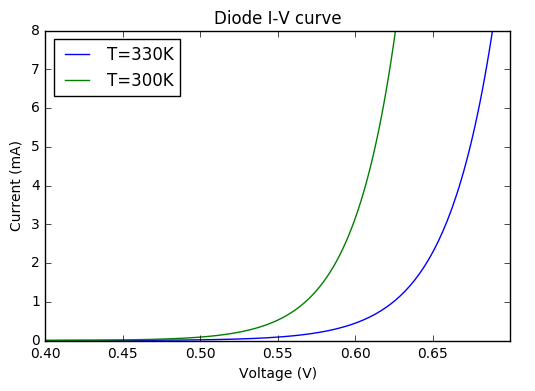

In [17]:
interact(plot_curve, T=IntSlider(min=200, max=400, step=1, value=330, description='Temperature'));